In [ ]:
#tempat yg belum dikunjungi, kemudian bisa dikunjungi
def is_valid_move(x, y, n, visited):
    return 0 <= x < n and 0 <= y < n and not visited[x][y]

#gerak pion kuda
def get_legal_moves(x, y, n, visited):
    moves = []
    possible_moves = [(-2, 1), (-1, 2), (1, 2), (2, 1), (2, -1), (1, -2), (-1, -2), (-2, -1)]
    for dx, dy in possible_moves:
        new_x, new_y = x + dx, y + dy
        if is_valid_move(new_x, new_y, n, visited):
            moves.append((new_x, new_y))
    return moves

#print board yg telah dikunjungi
def print_board(board):
    for row in board:
        print(" ".join(row))
    print()

#algoritma yang dipake
def warnsdorff_closed_tour(n, start_x, start_y):
    visited = [[False for _ in range(n)] for _ in range(n)]
    x, y = start_x, start_y
    visited[x][y] = True
    closed_tour = [(x, y)]

    for step in range(n * n - 1):
        legal_moves = get_legal_moves(x, y, n, visited)
        legal_moves.sort(key=lambda move: len(get_legal_moves(move[0], move[1], n, visited)))
        x, y = legal_moves[0]
        visited[x][y] = True
        closed_tour.append((x, y))

        # Update board for visualization
        board = [["." for _ in range(n)] for _ in range(n)]
        for move_x, move_y in closed_tour:
            board[move_x][move_y] = "K"

        print(f"Step {step + 1}: Knight at ({x}, {y})")
        print_board(board)

    return closed_tour

# Contoh penggunaan untuk papan catur 8x8
n = 8
start_x, start_y = 7, 0

# Inisialisasi papan dan tampilkan langkah 0
board = [["." for _ in range(n)] for _ in range(n)]
board[start_x][start_y] = "K"
print(f"Step 0: Knight at ({start_x}, {start_y})")
print_board(board)

closed_tour = warnsdorff_closed_tour(n, start_x, start_y)



Step 0: Knight at (7, 0)
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
K . . . . . . .

Step 1: Knight at (5, 1)
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. K . . . . . .
. . . . . . . .
K . . . . . . .

Step 2: Knight at (7, 2)
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. K . . . . . .
. . . . . . . .
K . K . . . . .

Step 3: Knight at (6, 0)
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. K . . . . . .
K . . . . . . .
K . K . . . . .

Step 4: Knight at (4, 1)
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. K . . . . . .
. K . . . . . .
K . . . . . . .
K . K . . . . .

Step 5: Knight at (2, 0)
. . . . . . . .
. . . . . . . .
K . . . . . . .
. . . . . . . .
. K . . . . . .
. K . . . . . .
K . . . . . . .
K . K . . . . .

Step 6: Knight at (0, 1)
. K . . . . . .
. . . . . . . .
K . . . . . . .
. .

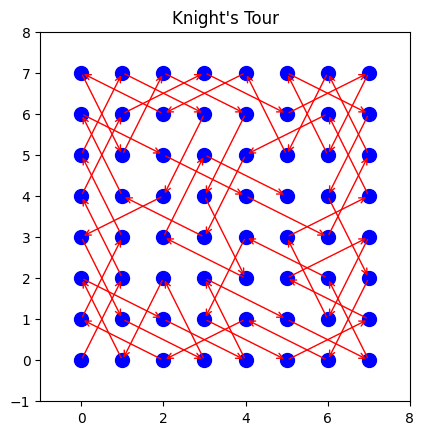

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def is_valid_move(x, y, n, visited):
    return 0 <= x < n and 0 <= y < n and not visited[x][y]

def get_legal_moves(x, y, n, visited):
    moves = []
    possible_moves = [(-2, 1), (-1, 2), (1, 2), (2, 1), (2, -1), (1, -2), (-1, -2), (-2, -1)]
    for dx, dy in possible_moves:
        new_x, new_y = x + dx, y + dy
        if is_valid_move(new_x, new_y, n, visited):
            moves.append((new_x, new_y))
    return moves

def is_attacking_square(x, y, attack_x, attack_y):
    return x == attack_x and y == attack_y

def has_visited_all_squares(visited):
    return all(all(row) for row in visited)

def warnsdorff_closed_tour_with_attack(n, start_x, start_y, attack_x, attack_y):
    visited = [[False for _ in range(n)] for _ in range(n)]
    x, y = start_x, start_y
    visited[x][y] = True
    closed_tour = [(x, y)]

    for step in range(n * n - 1):
        legal_moves = get_legal_moves(x, y, n, visited)
        legal_moves.sort(key=lambda move: len(get_legal_moves(move[0], move[1], n, visited)))
        x, y = legal_moves[0]
        visited[x][y] = True
        closed_tour.append((x, y))

        # Check if the tour is closed with an attack on the last step
        if is_attacking_square(x, y, attack_x, attack_y) and has_visited_all_squares(visited):
            break

    return closed_tour

def plot_arrow(ax, start, end):
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->'))

def plot_knight_tour(n, tour):
    fig, ax = plt.subplots()
    ax.set_xlim([-1, n])
    ax.set_ylim([-1, n])
    ax.set_aspect('equal', adjustable='box')

    for i in range(len(tour) - 1):
        plot_arrow(ax, tour[i], tour[i + 1])

    plt.scatter(*zip(*tour), color='blue', marker='o', s=100)
    plt.title('Knight\'s Tour')
    plt.show()

# Contoh penggunaan untuk papan catur 8x8
n = 8
start_x, start_y = 0, 0
attack_x, attack_y = 2, 1  # Ganti dengan koordinat attacking square yang diinginkan

closed_tour = warnsdorff_closed_tour_with_attack(n, start_x, start_y, attack_x, attack_y)
plot_knight_tour(n, closed_tour)


In [ ]:
def is_valid_move(x, y, n, visited):
    return 0 <= x < n and 0 <= y < n and not visited[x][y]

def get_legal_moves(x, y, n, visited):
    moves = []
    possible_moves = [(-2, 1), (-1, 2), (1, 2), (2, 1), (2, -1), (1, -2), (-1, -2), (-2, -1)]
    for dx, dy in possible_moves:
        new_x, new_y = x + dx, y + dy
        if is_valid_move(new_x, new_y, n, visited):
            moves.append((new_x, new_y))
    return moves

def warnsdorff_closed_tour(n, start_x, start_y):
    visited = [[False for _ in range(n)] for _ in range(n)]
    x, y = start_x, start_y
    visited[x][y] = True
    closed_tour = [(x, y)]

    for step in range(n*n - 1):
        legal_moves = get_legal_moves(x, y, n, visited)
        legal_moves.sort(key=lambda move: len(get_legal_moves(move[0], move[1], n, visited)))
        x, y = legal_moves[0]
        visited[x][y] = True
        closed_tour.append((x, y))

        print(f"Step {step + 1}: Knight at ({x}, {y})")

    return closed_tour

# Contoh penggunaan untuk papan catur 8x8
n = 8
start_x, start_y = 0, 0
closed_tour = warnsdorff_closed_tour(n, start_x, start_y)


Step 1: Knight at (1, 2)
Step 2: Knight at (0, 4)
Step 3: Knight at (1, 6)
Step 4: Knight at (3, 7)
Step 5: Knight at (5, 6)
Step 6: Knight at (7, 7)
Step 7: Knight at (6, 5)
Step 8: Knight at (5, 7)
Step 9: Knight at (7, 6)
Step 10: Knight at (6, 4)
Step 11: Knight at (7, 2)
Step 12: Knight at (6, 0)
Step 13: Knight at (4, 1)
Step 14: Knight at (2, 0)
Step 15: Knight at (0, 1)
Step 16: Knight at (1, 3)
Step 17: Knight at (0, 5)
Step 18: Knight at (1, 7)
Step 19: Knight at (3, 6)
Step 20: Knight at (2, 4)
Step 21: Knight at (0, 3)
Step 22: Knight at (1, 1)
Step 23: Knight at (3, 0)
Step 24: Knight at (2, 2)
Step 25: Knight at (1, 0)
Step 26: Knight at (0, 2)
Step 27: Knight at (2, 1)
Step 28: Knight at (4, 0)
Step 29: Knight at (3, 2)
Step 30: Knight at (5, 1)
Step 31: Knight at (7, 0)
Step 32: Knight at (6, 2)
Step 33: Knight at (4, 3)
Step 34: Knight at (3, 1)
Step 35: Knight at (5, 0)
Step 36: Knight at (7, 1)
Step 37: Knight at (5, 2)
Step 38: Knight at (7, 3)
Step 39: Knight at (6